In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

###  Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


###  Initial Time-Series Plotting
  Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:title={'center':'Yen Future Settle Prices'}, xlabel='Date'>

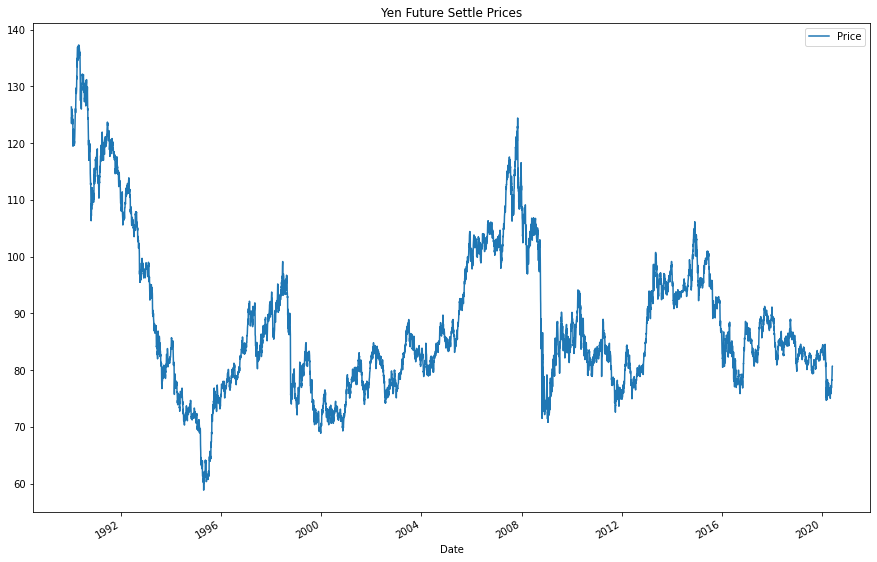

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot(figsize=[15,10],title='Yen Future Settle Prices',legend=True)

##  Decomposition Using a Hodrick-Prescott Filter
  Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
cad_jpy_df2 = cad_jpy_df[['Price']].copy()
cad_jpy_df2['trend'] = ts_trend
cad_jpy_df2['noise'] = ts_noise
cad_jpy_df2.tail()

,Price,trend,noise
Date,,,
2020-05-29,78.29,78.793961,-0.503961
2020-06-01,79.27,79.051061,0.218939
2020-06-02,80.40,79.311883,1.088117
2020-06-03,80.70,79.574499,1.125501
2020-06-04,80.71,79.837661,0.872339


In [7]:
cad_jpy_df2.head()

,Price,trend,noise
Date,,,
1990-01-02,126.37,125.850905,0.519095
1990-01-03,125.30,125.679684,-0.379684
1990-01-04,123.46,125.508788,-2.048788
1990-01-05,124.54,125.338304,-0.798304
1990-01-08,124.27,125.167037,-0.897037


<AxesSubplot:title={'center':'Exchange Rate vs The Trend'}, xlabel='Date'>

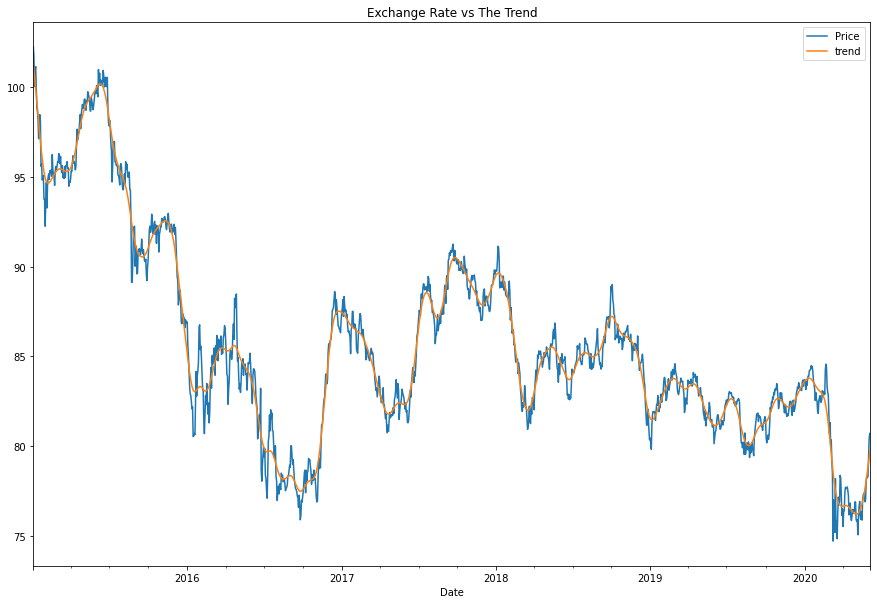

In [8]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_df3 = cad_jpy_df2.loc["2015-01-02":,:]
cad_jpy_df3.plot(y=['Price','trend'],figsize=[15,10],title='Exchange Rate vs The Trend',legend=True)

##### Question: Do you see any patterns, long-term and/or short? 
Answer: The Yen follows a short term pattern indicating the excahnge rate price has been decreasing over the years. 

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

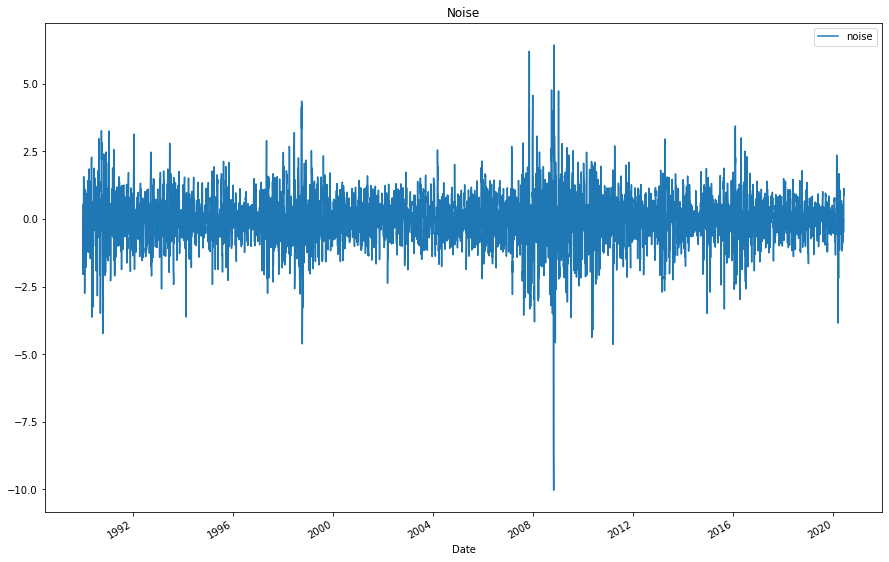

In [9]:
# Plot the Settle Noise
cad_jpy_df2.plot(y='noise',figsize=[15,10],title='Noise',legend=True)

## Forecasting the Exchange Rate Price using an ARIMA Model

1) Using the raw CAD/JPY exchange rate price, estimate an ARIMA model.
   1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
   2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
2) Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3) Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(cad_jpy_df['Price'], order=(5,1,1))

# Fit the model
results = model.fit()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Sat, 06 Aug 2022   AIC                          17505.796
Time:                        18:33:16   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0118      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.380      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:title={'center':'5 Day Futures Price Forecast'}>

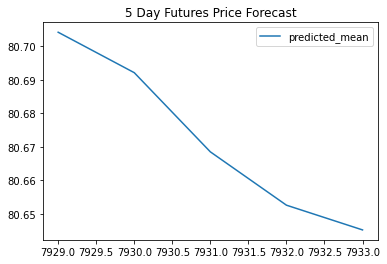

In [12]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="5 Day Futures Price Forecast")

##### Question: What does the model forecast will happen to the Japanese Yen in the near term?
Answer: The model forecast the Japanese Yen will have a negative trend movement in the near term.

## Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term volatility of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.

Using exchange rate Returns, estimate a GARCH model. Hint: You can reuse the returns variable from the ARMA model section.

1) GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2) Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3) Plot the 5-day forecast of the volatility.

In [13]:
import arch as arch

In [36]:
# Estimate a GARCH model:
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
results = model.fit(disp="off")

NameError: name 'returns' is not defined

In [37]:
# Summarize the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Sat, 06 Aug 2022   AIC                          17505.796
Time:                        21:20:21   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0118      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.380      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Covariance estimator: robust

Note: Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [38]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

NameError: name 'returns' is not defined

In [39]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start=last_day, horizon=forecast_horizon) 

NameError: name 'last_day' is not defined

In [40]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

NameError: name 'forecasts' is not defined

In [41]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

NameError: name 'intermediate' is not defined

In [42]:
# Plot the final forecast
final.plot(title="5 Day Exchange Rate Forecast of Volatility")

NameError: name 'final' is not defined

##### Question: What does the model forecast will happen to volatility in the near term?
Answer: The model forecast that the volatility is expected to increase over the next 5 days.

##  Conclusions

##### Based on your time series analysis, would you buy the yen now?
The time series analysis recommends not to buy the yen at the current time period. Although a growth in the currency is predicted, the model findings indicate that the models do not accurately represent the data. The model is also not a good fit since they do not match the data well.

##### Is the risk of the yen expected to increase or decrease?
The amount of volatility associated with the Yen indicates that the currency is risky. ARIMA model and GARCH model both produce a conflicting representation of the model because ARIMA shows Yen will decrease and GARCH indicates the opposite. The currency shouldn't be purchased until the model is a good fit. 

##### Based on the model evaluation, would you feel confident in using these models for trading?
Until the model has been modified to produce more promising outcomes I would recommend not to use the models for trading. 